In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import os
import pandas as pd
import numpy as np
from pickle import dump, load

import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/My Drive/FertPredictDataset.csv')
X = data.drop('class', axis=1)
y = pd.get_dummies(data['class'], prefix='class')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1234)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [ ]:
data.describe()

,Ca,Mg,K,S,N,Lime,C,P,Moisture,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.552033,0.552158,0.554284,0.551032,0.551782,0.548030,0.549656,0.550594,0.702939,2.500938
std,0.207752,0.208562,0.209547,0.204817,0.209015,0.205967,0.205063,0.203223,0.141236,1.118104
min,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.500000,1.000000
25%,0.500000,0.500000,0.450000,0.450000,0.450000,0.450000,0.450000,0.450000,0.600000,2.000000
50%,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.700000,3.000000
75%,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.700000,0.800000,3.500000
max,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,0.900000,4.000000


In [ ]:
scaler_filename = './scaler.pkl'
if os.path.isfile(scaler_filename):
    scaler = load(open(scaler_filename, 'rb'))
else:
    scaler = StandardScaler().fit(X_train)
    # save the scaler
    dump(scaler, open(scaler_filename, 'wb'))

In [ ]:
def BaseModel(data):
    inputs = keras.Input(shape=data.shape[1])
    x = layers.Dense(10, activation='relu')(inputs)
    x = layers.Dense(15, activation='relu')(x)
    x = layers.Dense(10, activation='relu')(x)
    x = layers.Dense(4, activation='sigmoid')(x)
    outputs = layers.Softmax()(x)
    return keras.Model(inputs, outputs)

baseModel = BaseModel(X_train)

In [ ]:
learning_rate = 0.01
epochs = 50
baseModel.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = baseModel.fit(X_train, y_train, batch_size=10, epochs=epochs, shuffle=True)

Epoch 1/50
112/112 [==============================] - 0s 1ms/step - loss: 1.1706 - accuracy: 0.5308
Epoch 2/50
112/112 [==============================] - 0s 1ms/step - loss: 0.8263 - accuracy: 0.9643
Epoch 3/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7665 - accuracy: 0.9812
Epoch 4/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7518 - accuracy: 0.9946
Epoch 5/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7480 - accuracy: 0.9973
Epoch 6/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7459 - accuracy: 0.9982
Epoch 7/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7455 - accuracy: 0.9991
Epoch 8/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 1.0000
Epoch 9/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 1.0000
Epoch 10/50
112/112 [==============================] - 0s 1ms/step - loss: 0.7439 - accuracy: 1.0000

In [ ]:
# Save models
baseModel.save('./saved_models/baseModel')

INFO:tensorflow:Assets written to: ./saved_models/baseModel/assets


In [ ]:
baseModel = models.load_model('./saved_models/baseModel')

In [ ]:
preds = baseModel.predict(scaler.fit_transform(X_test))
print(preds)

[[0.1748858  0.1748789  0.4753499  0.17488542]
 [0.47536692 0.17487772 0.17487772 0.17487772]
 [0.1748777  0.1748777  0.1748777  0.47536686]
 ...
 [0.47536692 0.17487772 0.17487772 0.17487772]
 [0.47536692 0.17487772 0.17487772 0.17487772]
 [0.1748777  0.1748777  0.47536686 0.1748777 ]]


dict_keys(['loss', 'accuracy'])


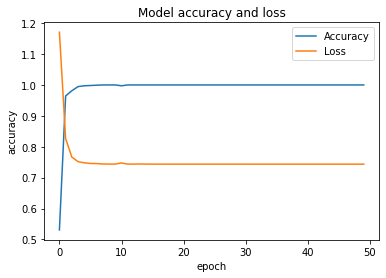

In [ ]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy and loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'], loc='upper right')
plt.show()